<a href="https://colab.research.google.com/github/sakshi2215/Machine_learning/blob/main/Lab2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def estimate_coef(x, y):
  # number of observations/points
  n = np.size(x)
  # mean of x and y vector
  m_x = np.mean(x)
  m_y = np.mean(y)

  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x

  # calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x

  return (b_0, b_1)


In [ ]:
def plot_regression_line(x, y, b):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "m",
      marker = "o", s = 30)

  # predicted response vector
  y_pred = b[0] + b[1]*x

  # plotting the regression line
  plt.plot(x, y_pred, color = "g")

  # putting labels
  plt.xlabel('x')
  plt.ylabel('y')


In [ ]:
def main():
  # observations / data
  x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
  y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

  # estimating coefficients
  b = estimate_coef(x, y)
  plot_regression_line(x, y, b)
  print(b)


(1.2363636363636363, 1.1696969696969697)


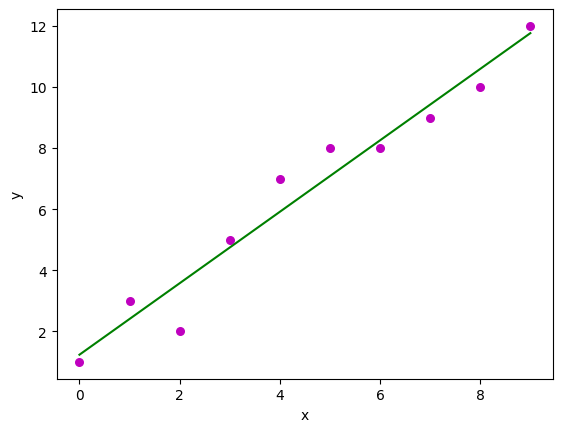

In [ ]:
main()

# Formula for m and b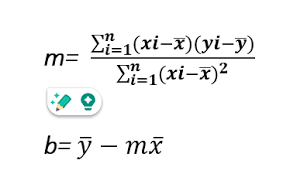

In [ ]:
import numpy as np

# Function to calculate m and b
def linear_regression(X, y):
    x_mean = np.mean(X)
    y_mean = np.mean(y)
    numerator = np.sum((X - x_mean) * (y - y_mean))
    denominator = np.sum((X - x_mean) ** 2)
    m = numerator / denominator
    b = y_mean - (m * x_mean)
    return m, b

# Function to calculate prediction
def predict(X, m, b):
    return m * X + b

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

X = np.array([7, 8, 10, 12, 15, 18])
Y = np.array([9, 10, 12, 13, 16, 20])

# Training the model
m, b = linear_regression(X, Y)

# Making predictions
predictions = predict(X, m, b)

# Calculating RMSE
error = rmse(Y, predictions)

print("Slope (m):", m)
print("Intercept (b):", b)
print("Predictions:", predictions)
print("RMSE:", error)

Slope (m): 0.9589552238805968
Intercept (b): 2.145522388059705
Predictions: [ 8.85820896  9.81716418 11.73507463 13.65298507 16.52985075 19.40671642]
RMSE: 0.4440037201224643


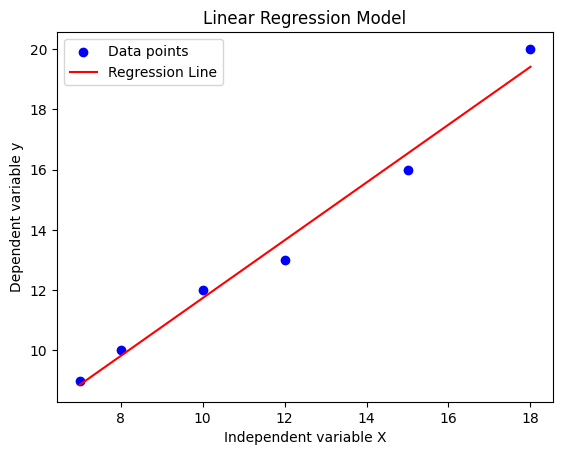

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

## Salary Prediction

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [ ]:
# Get dataset
df_sal = pd.read_csv('/content/salary_data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<ipython-input-19-2d754b325291>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Salary'])


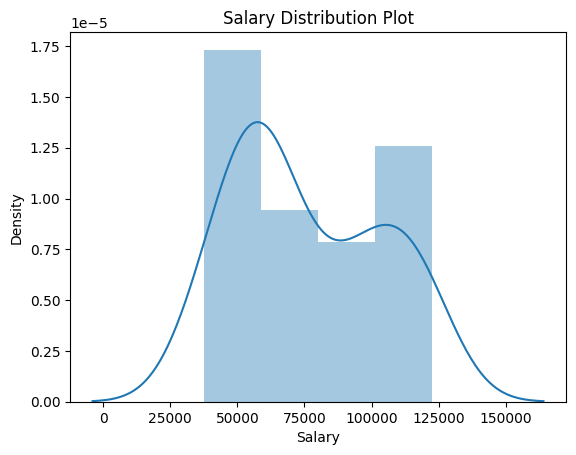

In [ ]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()


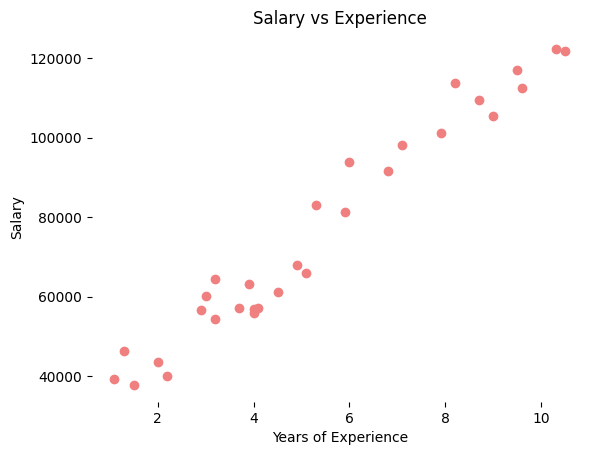

In [ ]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [ ]:
# Splitting variables
X=df_sal['YearsExperience'].values
y=df_sal['Salary'].values


In [ ]:
# number of observations/points
m = len(X)
# mean of x and y vector
m_x = np.mean(X)
m_y = np.mean(y)

numer=0
denom=0

for i in range(m):
  numer+=(X[i]-m_x)*(y[i]-m_y)
  denom+=(X[i]-m_x)**2

# calculating regression coefficients
b1 = numer/denom
b0 = m_y - (b1*m_x)
print("B0:",b0,"B1:",b1)

B0: 25792.20019866869 B1: 9449.962321455077


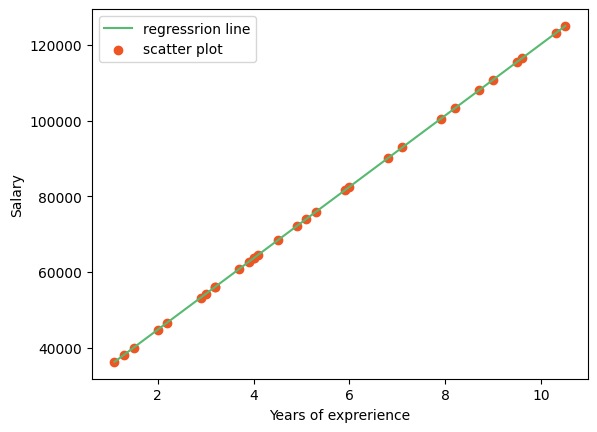

In [ ]:
#plotting values and regression line
max_x=np.max(X)+100
min_x=np.min(X)-100

#calculating line values x & y
x=np.linspace(min_x,max_x,1000)
y_new=b0+b1*X

#plotting line
plt.plot(X,y_new,color='#58b970',label='regressrion line')
plt.scatter(X,y_new,c='#ef5423',label='scatter plot')

plt.xlabel('Years of exprerience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
#calucalating R^2 values
ss_t=0
ss_r=0
for i in range(m):
  y_pred=b0+b1*X[i]
  ss_t+=(y[i]-m_y)**2
  ss_r+=(y_pred-m_y)**2
r2=(ss_r/ss_t)
print(r2)

0.9569566641435084


In [ ]:
# Splitting dataset into test/train
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:

# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

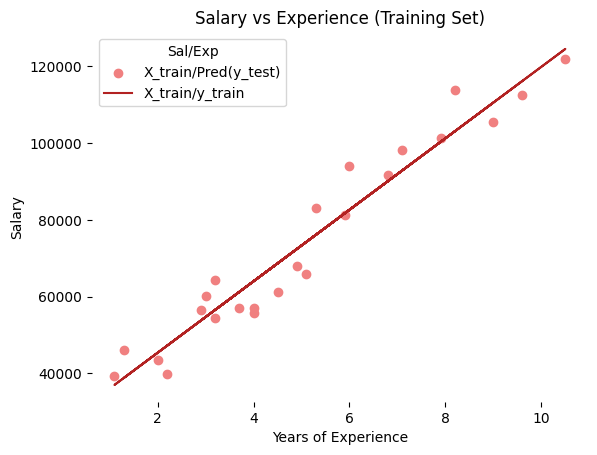

In [ ]:

# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

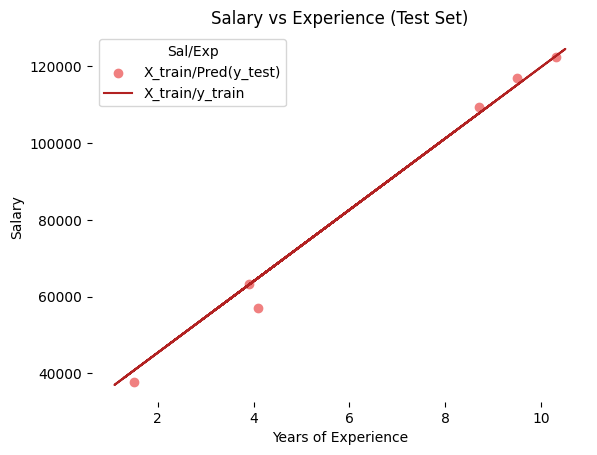

In [ ]:

# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [ ]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9312.57512673]]
Intercept: [26780.09915063]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Calculate R^2 score
r2 = r2_score(y, y_pred)
print("R^2 score:", r2)

R^2 score: 0.9569566641435086
